In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
X, Y = load_planar_dataset()

In [5]:
X.shape
Y.shape

(2, 400)

(1, 400)

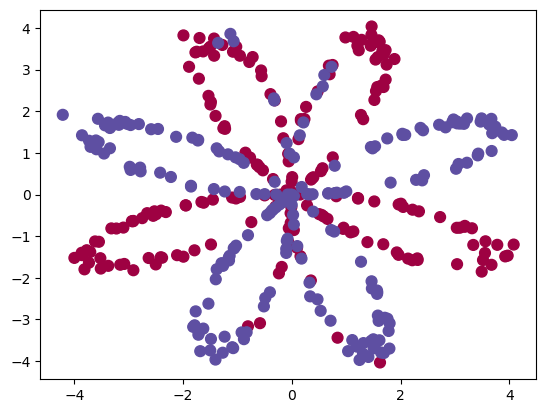

In [6]:
plt.scatter(X[0, :], X[1, :], c=Y, s=60, cmap=plt.cm.Spectral);

#### Simple Logistic Regression

In [7]:
model = sklearn.linear_model.LogisticRegressionCV()
model.fit(X.T,Y.T)

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

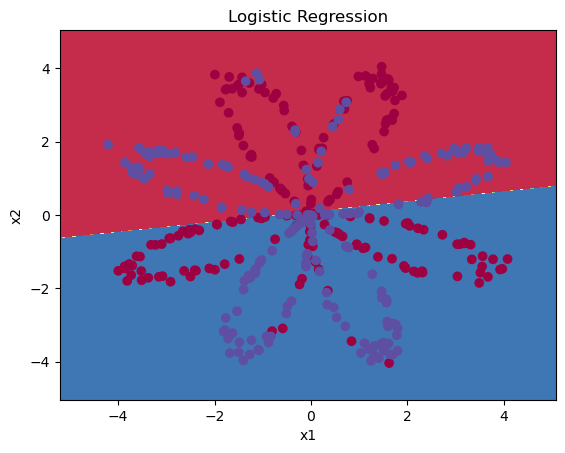

In [8]:
plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Logistic Regression")

In [9]:
LR_predictions = model.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [10]:
X.shape[0]

2

#### Defining the Neural Network Structure

In [11]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [12]:
def initialize_parameters(n_x,n_h,n_y):
    
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [21]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) +b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1":Z1,
            "A1":A1,
            "Z2":Z2,
            "A2":A2}
    return A2,cache

In [14]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost)) 
    
    return cost

In [15]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dw1 = grads['dW1']
    db1 = grads['db1']    
    dw2 = grads['dW2']    
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0,num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print('Cost after iteration %i: %f'%(i,cost))
        return parameters

In [19]:
def predict(parameters, X):
    A2,cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    
    return predictions

Cost after iteration 0: 0.693048


Text(0.5, 1.0, 'Decision Boundary ')

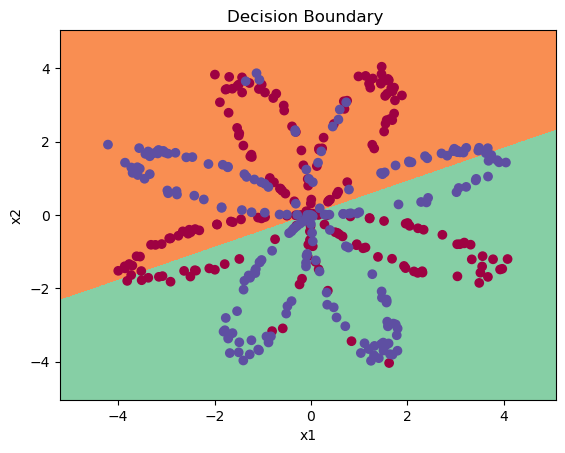

In [23]:
parameters = nn_model(X,Y, 4, 1.2, num_iterations = 10000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T),X,Y)
plt.title('Decision Boundary ')